# Sales Analysis

Task is to analyze the company's sales data from the previous year and provide actionable insights and recommendations. 

## EXPLORATORY DATA ANALYSIS

It involves a number of steps:

1. Data Cleaning 

2. Data Visualization

3. Statistical Analysis - used to identify any relationship between variables and to test hypothesis about the data

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
### 1. import libraries

import pandas as pd # data preprocessing

import matplotlib.pyplot as plt # data visualization

import seaborn as sns # data visualization

import missingno as msno # missing data - Data Visualization

from collections import Counter # for counting

In [3]:
### 2. Load the dataset

data = pd.read_csv(r"C:\Users\PRISCILLA EBIMOBOERE\Downloads\DATA SCIENCE MATERIALS AND DATASETS\PYTHON\EDA\Dune Sales Data.csv")

In [4]:
data

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
0      19-Feb-16     High        Segun            29               F    Abia   
1      20-Feb-16     High        Segun            29               F    Abia   
2      27-Feb-16     High        Segun            29               F    Abia   
3      12-Mar-16     High        Segun            29               F    Abia   
4      12-Mar-16     High        Segun            29               F    Abia   
...          ...      ...          ...           ...             ...     ...   
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   
34866        NaN      NaN          NaN            38             NaN     NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0          Accessories     Keyboard         Online       1.0      80.00   
1             Clothing  Polo shirts         Online       2.0      24.50   
2          Accessories     Keyboard         Online       3.0       3.67   
3          Accessories     Keyboard         Online       2.0      87.50   
4          Accessories     Keyboard         Online       3.0      35.00   
...                ...          ...            ...       ...        ...   
34862           Phones       IPhone         Online       2.0    1160.00   
34863           Phones       IPhone         Online       1.0    2049.00   
34864           Phones       IPhone         Online       3.0     683.00   
34865           Phones       IPhone         Online       1.0    2320.00   
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
0          109.00  
1           28.50  
2            5.00  
3          116.50  
4           41.67  
...           ...  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  
34866         NaN  

[34867 rows x 12 columns]

In [5]:
# print the top rows

data.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   
2  27-Feb-16     High        Segun            29               F  Abia   
3  12-Mar-16     High        Segun            29               F  Abia   
4  12-Mar-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  
0      109.00  
1       28.50  
2        5.00  
3      116.50  
4       41.67

In [6]:
# print the bottom rows

data.tail()

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   
34866        NaN      NaN          NaN            38             NaN     NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34862           Phones       IPhone         Online       2.0     1160.0   
34863           Phones       IPhone         Online       1.0     2049.0   
34864           Phones       IPhone         Online       3.0      683.0   
34865           Phones       IPhone         Online       1.0     2320.0   
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  
34866         NaN

In [7]:
# dimensionality of the data - exploring the shape. number of rows and columns

data.shape

(34867, 12)

In [8]:
print(f"we have {data.shape[0]} rows and {data.shape[1]} columns")

we have 34867 rows and 12 columns


In [9]:
# examine the columns/features of the data. feature engineering/feature analysis refers to the column

data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [10]:
# investigating the dataset for anomalies and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [11]:
# returns rows with any missing value

empty_row = data[data.isna().any(axis=1)]

empty_row

Date Customer Sales Person  Customer_Age Customer_Gender State  \
34866  NaN      NaN          NaN            38             NaN   NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34866         NaN

In [12]:
# returns rows with all values missing

data[data.isnull().all(axis=1)]


Empty DataFrame
Columns: [Date, Customer, Sales Person, Customer_Age, Customer_Gender, State, Product_Category, Sub_Category, Payment Option, Quantity, Unit_Cost, Unit_Price]
Index: []

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [14]:
# Numerical statistical analysis. The below gives you only numerical data

data.describe()

Customer_Age      Quantity     Unit_Cost    Unit_Price
count  34867.000000  34866.000000  34866.000000  34866.000000
mean      36.382683      2.002524    349.880567    389.232473
std       11.112813      0.813936    490.015846    525.319097
min       17.000000      1.000000      0.670000      0.670000
25%       28.000000      1.000000     45.000000     53.670000
50%       35.000000      2.000000    150.000000    179.000000
75%       44.000000      3.000000    455.000000    521.000000
max       87.000000      3.000000   3240.000000   5082.000000

In [15]:
# categorical statistical analysis

data.describe(include =["object","bool"])

## 1. Row: count
## This tells you how many non-null (non-missing) values are in each column.

## 2. Row: unique
## This shows how many distinct values (not repeated) appear in each column.

## 3. Row: top
## This shows the most frequently occurring value in each column — the mode.

## 4. Row: freq
## This shows how many times the top value occurred.

Date Customer Sales Person Customer_Gender  State  \
count      34866    34866        34866           34866  34866   
unique       576        4            7               2     36   
top     1-Mar-16      Low       Remota               F  Lagos   
freq         196    13041         6667           17439  10332   

       Product_Category Sub_Category Payment Option  
count             34866        34866          34866  
unique                3           17              3  
top         Accessories     Keyboard           Cash  
freq              22534        11112          15911

## DEALING WITH MISSING VALUES

1. MCAR (Missing completely at random): Values that are randomly missing and do not depend on any other values1

2. MAR (Missing at random) - values that are dependent on additional features

3. MNAR (Missing not at random) - there is a reason behind why these values are missing

There are several methods for imputing missing data, including the measures of central Tendency, regression imputation, and multiple imputation. Measures of central tendency involves replacing missing values with either the mean, mode and median of the variable. Regression imputation involves using other variables in the dataset to predict missing values.


In [16]:
# investigate the missing data

null_vals = data.isnull().sum()

In [17]:
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

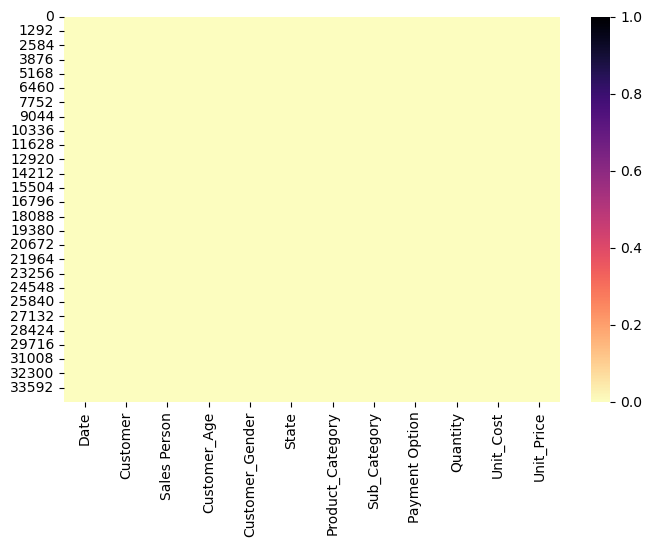

In [18]:
# visualize the missing data

plt.figure(figsize = (8,5))

sns.heatmap(data.isnull(), cbar=True, cmap="magma_r");

#; removes the title

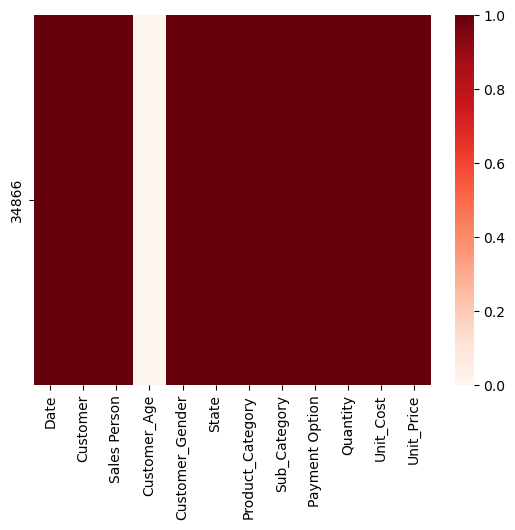

In [19]:
# show only missing rows

sns.heatmap(data[data.isnull().any(axis=1)].isnull(), cmap="Reds");


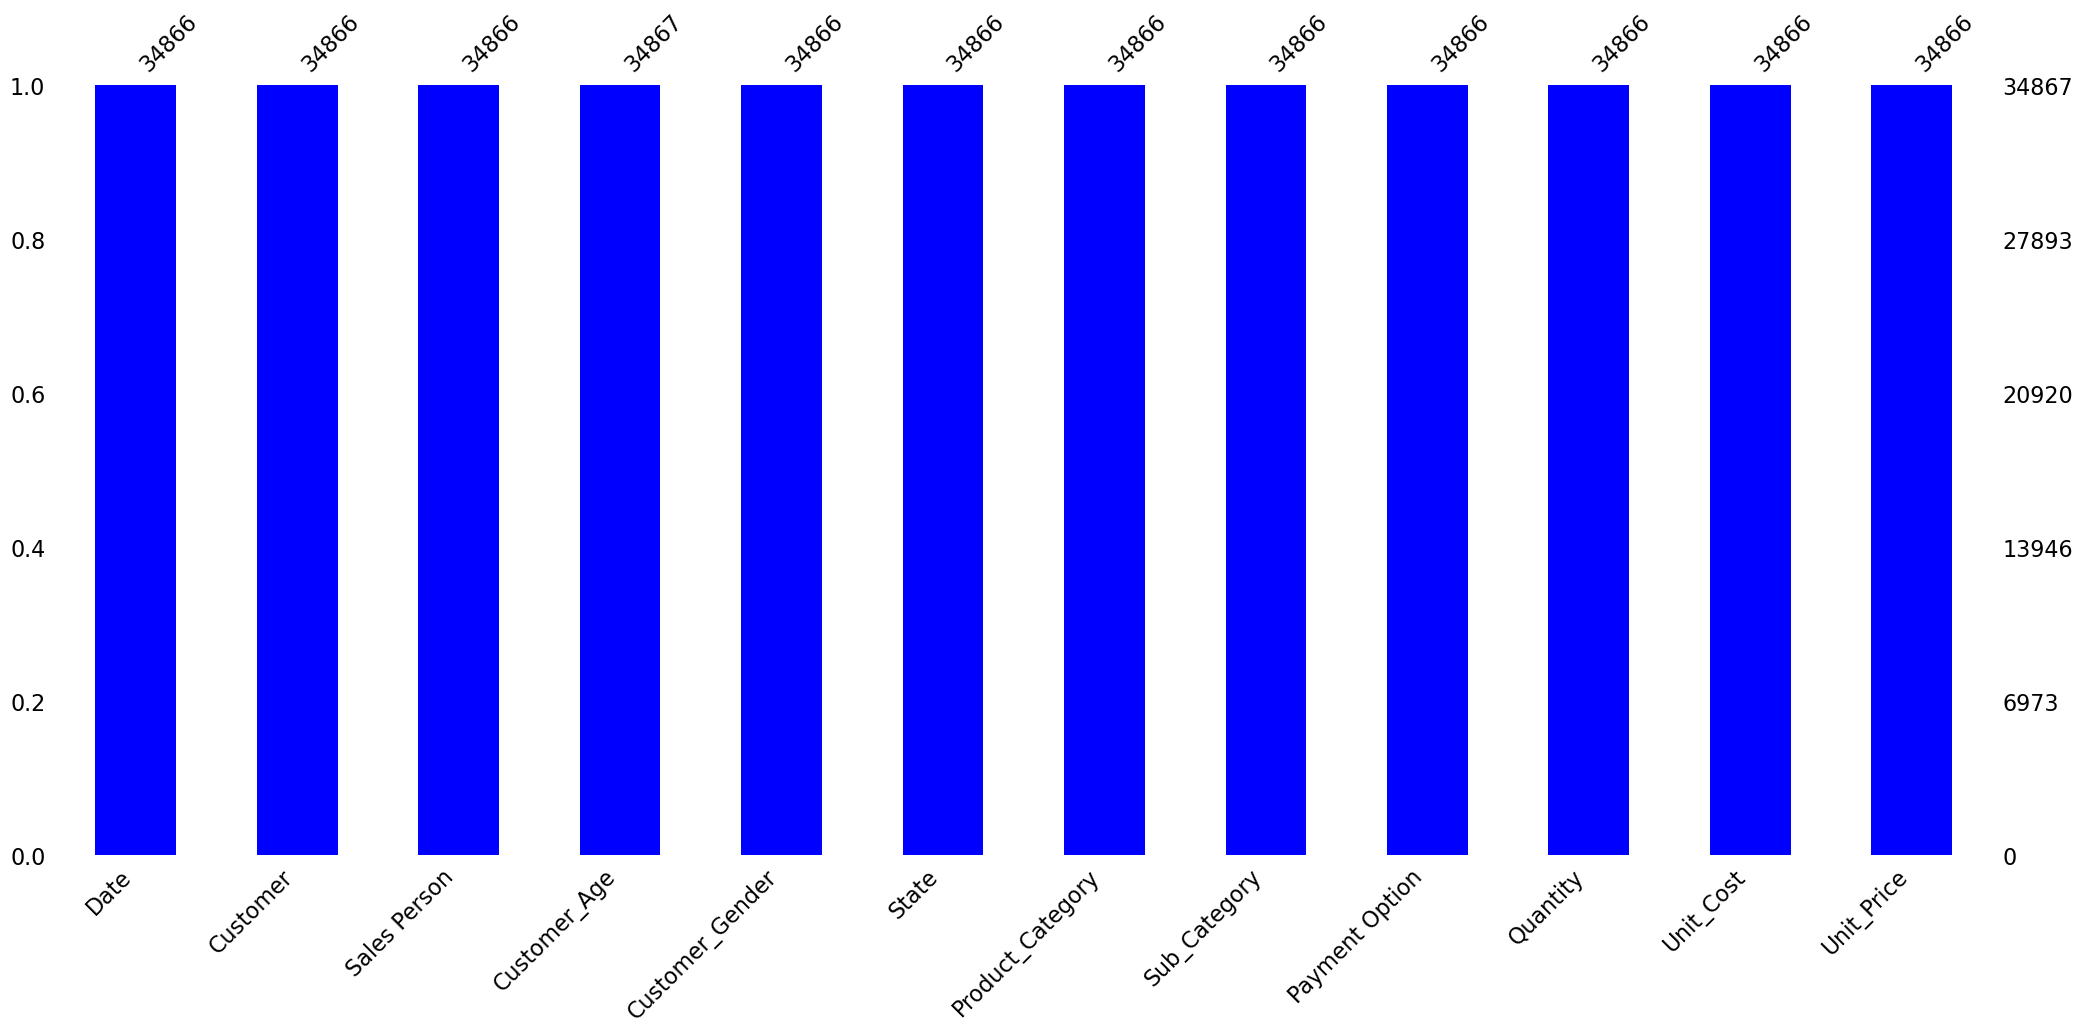

In [20]:
msno.bar(data, color="blue");

In [21]:
# disply where the missing data exists 

data[data.isnull().any(axis=1)]

Date Customer Sales Person  Customer_Age Customer_Gender State  \
34866  NaN      NaN          NaN            38             NaN   NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34866         NaN

In [22]:
# remove null values

data.dropna(inplace =True)

In [23]:
data

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
0      19-Feb-16     High        Segun            29               F    Abia   
1      20-Feb-16     High        Segun            29               F    Abia   
2      27-Feb-16     High        Segun            29               F    Abia   
3      12-Mar-16     High        Segun            29               F    Abia   
4      12-Mar-16     High        Segun            29               F    Abia   
...          ...      ...          ...           ...             ...     ...   
34861  22-Mar-15     High        Kenny            37               M   Kebbi   
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0          Accessories     Keyboard         Online       1.0      80.00   
1             Clothing  Polo shirts         Online       2.0      24.50   
2          Accessories     Keyboard         Online       3.0       3.67   
3          Accessories     Keyboard         Online       2.0      87.50   
4          Accessories     Keyboard         Online       3.0      35.00   
...                ...          ...            ...       ...        ...   
34861           Phones       IPhone         Online       1.0    2049.00   
34862           Phones       IPhone         Online       2.0    1160.00   
34863           Phones       IPhone         Online       1.0    2049.00   
34864           Phones       IPhone         Online       3.0     683.00   
34865           Phones       IPhone         Online       1.0    2320.00   

       Unit_Price  
0          109.00  
1           28.50  
2            5.00  
3          116.50  
4           41.67  
...           ...  
34861     1487.00  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  

[34866 rows x 12 columns]

In [24]:
data.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [25]:
# DATE TIME ANALYSIS


#convert date to datetime format because it's in object currently

data["Date"]= pd.to_datetime(data["Date"])

C:\Users\PRISCILLA EBIMOBOERE\AppData\Local\Temp\ipykernel_13976\3727414367.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"]= pd.to_datetime(data["Date"])


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [27]:
#look at the year

data["Date"].dt.year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
34861    2015
34862    2016
34863    2015
34864    2015
34865    2015
Name: Date, Length: 34866, dtype: int32

In [28]:
#look at the min year

data["Date"].dt.year.min()

2015

In [29]:
#look at the max year

data["Date"].dt.year.max()

2016

In [30]:
#look at the month

data["Date"].dt.month

0        2
1        2
2        2
3        3
4        3
        ..
34861    3
34862    2
34863    3
34864    4
34865    8
Name: Date, Length: 34866, dtype: int32

In [31]:
#look at the min month

data["Date"].dt.month.min()

1

In [32]:
#look at the max month

data["Date"].dt.month.max()

12

In [33]:
#look at the day

data["Date"].dt.day

0        19
1        20
2        27
3        12
4        12
         ..
34861    22
34862     7
34863    13
34864     5
34865    30
Name: Date, Length: 34866, dtype: int32

In [34]:
#look at the min day

data["Date"].dt.day.min()

1

In [35]:
#look at the max day

data["Date"].dt.day.max()

31

In [36]:
# extract the month, day, year and quarter and create a new column

#year column

data["Year"] = data["Date"].dt.year
data["Month_No"] = data["Date"].dt.month
data["Month"] = data["Date"].dt.month_name()
data["Day_No"] = data["Date"].dt.day
data["Day"] = data["Date"].dt.day_name()
data["Quater"] = "Q" + data["Date"].dt.quarter.astype(str)

In [37]:
data

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
0     2016-02-19     High        Segun            29               F    Abia   
1     2016-02-20     High        Segun            29               F    Abia   
2     2016-02-27     High        Segun            29               F    Abia   
3     2016-03-12     High        Segun            29               F    Abia   
4     2016-03-12     High        Segun            29               F    Abia   
...          ...      ...          ...           ...             ...     ...   
34861 2015-03-22     High        Kenny            37               M   Kebbi   
34862 2016-02-07     High        Kenny            38               M  Ebonyi   
34863 2015-03-13     High        Kenny            38               M  Ebonyi   
34864 2015-04-05     High        Kenny            38               M  Ebonyi   
34865 2015-08-30     High        Kenny            38               M  Ebonyi   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0          Accessories     Keyboard         Online       1.0      80.00   
1             Clothing  Polo shirts         Online       2.0      24.50   
2          Accessories     Keyboard         Online       3.0       3.67   
3          Accessories     Keyboard         Online       2.0      87.50   
4          Accessories     Keyboard         Online       3.0      35.00   
...                ...          ...            ...       ...        ...   
34861           Phones       IPhone         Online       1.0    2049.00   
34862           Phones       IPhone         Online       2.0    1160.00   
34863           Phones       IPhone         Online       1.0    2049.00   
34864           Phones       IPhone         Online       3.0     683.00   
34865           Phones       IPhone         Online       1.0    2320.00   

       Unit_Price  Year  Month_No     Month  Day_No       Day Quater  
0          109.00  2016         2  February      19    Friday     Q1  
1           28.50  2016         2  February      20  Saturday     Q1  
2            5.00  2016         2  February      27  Saturday     Q1  
3          116.50  2016         3     March      12  Saturday     Q1  
4           41.67  2016         3     March      12  Saturday     Q1  
...           ...   ...       ...       ...     ...       ...    ...  
34861     1487.00  2015         3     March      22    Sunday     Q1  
34862      985.50  2016         2  February       7    Sunday     Q1  
34863     1583.00  2015         3     March      13    Friday     Q1  
34864      560.67  2015         4     April       5    Sunday     Q2  
34865     1568.00  2015         8    August      30    Sunday     Q3  

[34866 rows x 18 columns]

In [38]:
data["Customer_Age"].min()

17

In [39]:
data["Customer_Age"].max()

87

In [40]:
# this creates automatic bins but When you write bins=5, pandas looks at the minimum and maximum age and:

# Splits the range evenly into 5 chunks

# But the edges won't be exactly 17–30, 31–44, etc. unless you define them manually

# data['AgeGroup'] = pd.cut(
#     data['Age'],
#     bins=5,
#     labels=['Youth', 'Adult', 'Mi', '44–52', '53–61', '62–69', '70–87'],
#     include_lowest=True
# )


In [41]:
#specifying the bins and labels manually

# bins = [17, 30, 44, 58, 72, 87]
# labels = ['Youth', 'Young Adult', 'Middle Aged', 'Older Adult', 'Senior']

# data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)


In [42]:
# categorise customer age 

def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <=40:
        return "25-40 Adult"
    elif x <=50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elder"

# apply function to data

data["Age_Group"] = data["Customer_Age"].apply(age_group)

In [43]:
data

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
0     2016-02-19     High        Segun            29               F    Abia   
1     2016-02-20     High        Segun            29               F    Abia   
2     2016-02-27     High        Segun            29               F    Abia   
3     2016-03-12     High        Segun            29               F    Abia   
4     2016-03-12     High        Segun            29               F    Abia   
...          ...      ...          ...           ...             ...     ...   
34861 2015-03-22     High        Kenny            37               M   Kebbi   
34862 2016-02-07     High        Kenny            38               M  Ebonyi   
34863 2015-03-13     High        Kenny            38               M  Ebonyi   
34864 2015-04-05     High        Kenny            38               M  Ebonyi   
34865 2015-08-30     High        Kenny            38               M  Ebonyi   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0          Accessories     Keyboard         Online       1.0      80.00   
1             Clothing  Polo shirts         Online       2.0      24.50   
2          Accessories     Keyboard         Online       3.0       3.67   
3          Accessories     Keyboard         Online       2.0      87.50   
4          Accessories     Keyboard         Online       3.0      35.00   
...                ...          ...            ...       ...        ...   
34861           Phones       IPhone         Online       1.0    2049.00   
34862           Phones       IPhone         Online       2.0    1160.00   
34863           Phones       IPhone         Online       1.0    2049.00   
34864           Phones       IPhone         Online       3.0     683.00   
34865           Phones       IPhone         Online       1.0    2320.00   

       Unit_Price  Year  Month_No     Month  Day_No       Day Quater  \
0          109.00  2016         2  February      19    Friday     Q1   
1           28.50  2016         2  February      20  Saturday     Q1   
2            5.00  2016         2  February      27  Saturday     Q1   
3          116.50  2016         3     March      12  Saturday     Q1   
4           41.67  2016         3     March      12  Saturday     Q1   
...           ...   ...       ...       ...     ...       ...    ...   
34861     1487.00  2015         3     March      22    Sunday     Q1   
34862      985.50  2016         2  February       7    Sunday     Q1   
34863     1583.00  2015         3     March      13    Friday     Q1   
34864      560.67  2015         4     April       5    Sunday     Q2   
34865     1568.00  2015         8    August      30    Sunday     Q3   

         Age_Group  
0      25-40 Adult  
1      25-40 Adult  
2      25-40 Adult  
3      25-40 Adult  
4      25-40 Adult  
...            ...  
34861  25-40 Adult  
34862  25-40 Adult  
34863  25-40 Adult  
34864  25-40 Adult  
34865  25-40 Adult  

[34866 rows x 19 columns]

In [44]:
# calculate profit and loss

data["Revenue"] = data["Quantity"] * data["Unit_Price"]

data["COGs"] = data["Quantity"] * data["Unit_Cost"]

data["Profit"] = data["Revenue"] - data["COGs"]

data.head(50)

Date Customer Sales Person  Customer_Age Customer_Gender  State  \
0  2016-02-19     High        Segun            29               F   Abia   
1  2016-02-20     High        Segun            29               F   Abia   
2  2016-02-27     High        Segun            29               F   Abia   
3  2016-03-12     High        Segun            29               F   Abia   
4  2016-03-12     High        Segun            29               F   Abia   
5  2016-04-08     High        Segun            29               F   Abia   
6  2016-04-17     High        Segun            29               F   Abia   
7  2016-04-17     High        Segun            29               F   Abia   
8  2016-06-22     High        Segun            29               F   Abia   
9  2016-06-22     High        Segun            29               F   Abia   
10 2016-06-24     High        Segun            29               F   Abia   
11 2016-07-01     High        Segun            29               F   Abia   
12 2016-07-22     High        Segun            29               F   Abia   
13 2016-07-22     High        Segun            29               F   Abia   
14 2015-08-18     High        Segun            29               F   Abia   
15 2015-08-30     High        Segun            29               F   Abia   
16 2015-09-17     High        Segun            29               F   Abia   
17 2015-09-17     High        Segun            29               F   Abia   
18 2015-09-17     High        Segun            29               F   Abia   
19 2015-09-24     High        Segun            29               F   Abia   
20 2015-09-24     High        Segun            29               F   Abia   
21 2015-10-07     High        Segun            29               F   Abia   
22 2015-10-07     High        Segun            29               F   Abia   
23 2015-10-07     High        Segun            29               F   Abia   
24 2015-10-07     High        Segun            29               F   Abia   
25 2015-10-13     High        Segun            29               F   Abia   
26 2015-10-20     High        Segun            29               F   Abia   
27 2015-10-20     High        Segun            29               F   Abia   
28 2015-10-20     High        Segun            29               F   Abia   
29 2015-11-01     High        Segun            29               F   Abia   
30 2015-11-01     High        Segun            29               F   Abia   
31 2015-11-01     High        Segun            29               F   Abia   
32 2015-11-15     High        Segun            29               F   Abia   
33 2015-11-15     High        Segun            29               F   Abia   
34 2015-11-15     High        Segun            29               F   Abia   
35 2015-12-15     High        Segun            29               F   Abia   
36 2015-12-16     High        Segun            29               F   Abia   
37 2015-12-16     High        Segun            29               F   Abia   
38 2015-12-16     High        Segun            29               F   Abia   
39 2015-12-20     High        Segun            29               F   Abia   
40 2015-12-20     High        Segun            29               F   Abia   
41 2015-12-20     High        Segun            29               F   Abia   
42 2015-12-25     High        Segun            29               F   Abia   
43 2015-12-25     High        Segun            29               F   Abia   
44 2015-12-25     High        Segun            29               F   Abia   
45 2015-12-29     High        Segun            29               F   Abia   
46 2015-12-29     High        Segun            29               F   Abia   
47 2015-07-22     High        Segun            29               F  Lagos   
48 2015-10-10     High        Segun            18               F  Lagos   
49 2016-06-11     High        Segun            18               M  Lagos   

   Product_Category    Sub_Category Payment Option  Quantity  ...  Year  \
0       Accessories        Keyboard         Online       

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  Year              34866 non-null  int32         
 13  Month_No          34866 non-null  int32         
 14  Month             34866 non

In [46]:
# Profit/Loss grouping

def porl(x):
    if x>= 0:
        return "Profit"
    else:
        return "Loss"

data["Profit_Label"] = data['Profit'].apply(porl)
data.head(2)


Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Month_No  \
0      Accessories     Keyboard         Online       1.0  ...         2   
1         Clothing  Polo shirts         Online       2.0  ...         2   

      Month  Day_No       Day Quater    Age_Group Revenue  COGs Profit  \
0  February      19    Friday     Q1  25-40 Adult   109.0  80.0   29.0   
1  February      20  Saturday     Q1  25-40 Adult    57.0  49.0    8.0   

   Profit_Label  
0        Profit  
1        Profit  

[2 rows x 23 columns]

In [47]:
data["Profit_Label"].value_counts()["Loss"]

# or

# data[data["Profit_Label"] == "Loss"].shape[0] - gives the row


4854

In [48]:
data["Profit_Label"].value_counts()["Profit"]

30012

# UNIVARIATE ANALYSIS

It involves analyzing the distribution and summary statistics of individual variables/column/feature.

* - • Numerical Column/Feature = Numerical visualization Techniques

* - • Categorical Column/Feature = Categorical visualozation Techniques

# CATEGORICAL DATA VISUALIZATION

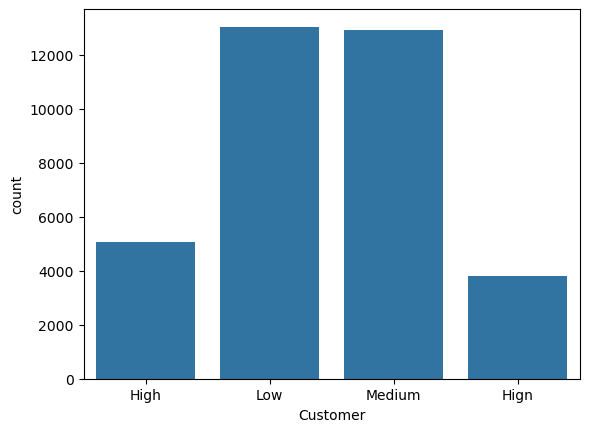

In [49]:
# How many customers belong to each customer spec

sns.countplot(x="Customer", data=data);

In [50]:
# clean up hign to high

# investigate the columns affected

data[data["Customer"]=="Hign"]

Date Customer Sales Person  Customer_Age Customer_Gender  State  \
29770 2015-08-03     Hign       Derick            28               F  Lagos   
29771 2015-08-04     Hign       Derick            28               F  Lagos   
29772 2015-08-04     Hign       Derick            28               F  Lagos   
29773 2015-08-10     Hign       Derick            28               F  Lagos   
29774 2015-08-25     Hign       Derick            28               F  Lagos   
...          ...      ...          ...           ...             ...    ...   
33581 2016-06-05     Hign     Chinazam            40               F  Lagos   
33582 2016-06-14     Hign     Chinazam            40               M   Abia   
33583 2016-06-19     Hign     Chinazam            40               M   Abia   
33584 2016-06-19     Hign     Chinazam            40               M   Abia   
33585 2015-11-09     Hign     Chinazam            40               M   Abia   

      Product_Category   Sub_Category Payment Option  Quantity  ...  Month_No  \
29770           Phones         IPhone           Cash       1.0  ...         8   
29771      Accessories       Keyboard           Cash       2.0  ...         8   
29772      Accessories       Keyboard           Cash       3.0  ...         8   
29773      Accessories       Keyboard           Cash       1.0  ...         8   
29774      Accessories       Keyboard           Cash       3.0  ...         8   
...                ...            ...            ...       ...  ...       ...   
33581      Accessories  Phone Charger         Online       1.0  ...         6   
33582         Clothing        Jerseys         Online       1.0  ...         6   
33583      Accessories  Phone Charger         Online       3.0  ...         6   
33584         Clothing        Jerseys         Online       2.0  ...         6   
33585         Clothing        Jerseys         Online       3.0  ...        11   

          Month  Day_No      Day Quater    Age_Group  Revenue     COGs  \
29770    August       3   Monday     Q3  25-40 Adult  2136.00  2295.00   
29771    August       4  Tuesday     Q3  25-40 Adult    39.00    35.00   
29772    August       4  Tuesday     Q3  25-40 Adult    56.01    50.01   
29773    August      10   Monday     Q3  25-40 Adult    69.00    60.00   
29774    August      25  Tuesday     Q3  25-40 Adult   141.00   125.01   
...         ...     ...      ...    ...          ...      ...      ...   
33581      June       5   Sunday     Q2  25-40 Adult   905.00   720.00   
33582      June      14  Tuesday     Q2  25-40 Adult  1638.00  1150.00   
33583      June      19   Sunday     Q2  25-40 Adult  4215.99  3240.00   
33584      June      19   Sunday     Q2  25-40 Adult  1022.00   900.00   
33585  November       9   Monday     Q4  25-40 Adult  1080.00   999.99   

       Profit  Profit_Label  
29770 -159.00          Loss  
29771    4.00        Profit  
29772    6.00        Profit  
29773    9.00        Profit  
29774   15.99        Profit  
...       ...           ...  
33581  185.00        Profit  
33582  488.00        Profit  
33583  975.99        Profit  
33584  122.00        Profit  
33585   80.01        Profit  

[3816 rows x 23 columns]

### Loc vs Iloc in pandas

| Feature            | `loc`                                | `iloc`                            |
| ------------------ | ------------------------------------ | --------------------------------- |
| Based on           | **Labels** (names like column names) | **Integer index positions**       |
| Typical use case   | `data.loc[condition, "ColumnName"]`  | `data.iloc[row_index, col_index]` |
| Can use conditions | ✅ Yes                                | ❌ No (not directly)               |


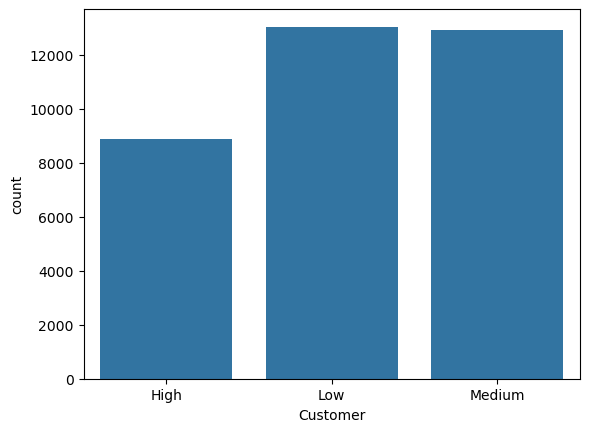

In [51]:
# correct the spelling of HIGN

data.loc[data["Customer"]=="Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=data);


In [52]:
# check the counts

data["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

### Narration about my observation

From this analysis, out of 34866 customers, 13041 fall under the low spend category followed by medium which had 12926 customers and high which has 8899.

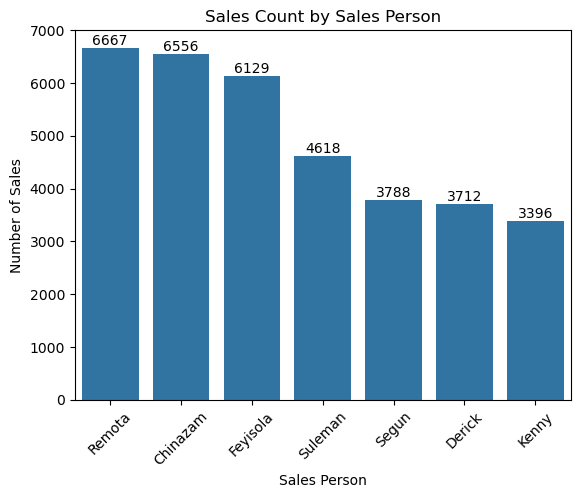

In [53]:
# sales person - how many transactions by sale person

# Create the plot
ax = sns.countplot(x=data["Sales Person"], order= data["Sales Person"].value_counts(ascending=False).index)

# add data labels

# Get the count numbers
values = data["Sales Person"].value_counts(ascending=False).values

# Add the numbers on top of the bars
ax.bar_label(container=ax.containers[0], labels=values)

# customize
plt.xticks(rotation=45)
plt.xlabel("Sales Person")
plt.ylabel("Number of Sales")
plt.title("Sales Count by Sales Person");

### Junior Data Scientist's Explanation

🎯 Objective:
To understand how many sales each salesperson made.

📊 Method:
I used seaborn.countplot to create a bar chart showing the number of transactions by each sales rep. I ordered the bars in descending order using .value_counts(), so the salesperson with the highest number of sales appears first.

🔢 Data Labels:
I used ax.bar_label() to show the exact number of transactions on top of each bar. To do this, I extracted the counts into a values variable, then added them using bar_label(container=ax.containers[0], labels=values).

✅ Result:
The chart shows that:

Remota, Chinazam, and Feyisola made the highest number of sales.

Kenny had the fewest.

This analysis helps us quickly identify top performers.

### Senior Data Scientist's Explanation

🧠 Objective:
We aim to evaluate sales distribution across individual team members and identify performance patterns within the sales team.

🔍 Approach:
A categorical frequency analysis was performed using seaborn.countplot, which provides a visual distribution of the number of transactions per salesperson. To enhance interpretability:

Bars were sorted in descending order of frequency using value_counts().index.

Explicit counts were added to each bar using ax.bar_label(), referencing the bar container object directly.

📈 Key Observations:
Remota leads with 6,667 transactions, followed closely by Chinazam and Feyisola.

The lower tier includes Derick and Kenny, with 3,712 and 3,396 transactions respectively.

🧩 Implications:
This distribution can guide resource allocation, performance reviews, and targeted training. Top performers may be studied for best practices, while those with lower sales may require additional support or role reassessment.

🛠 Technical Note:
The use of ax.containers[0] ensures that bar_label() targets the correct set of bars. This becomes especially critical when working with multiple bar groups (e.g., hue in seaborn).

### Middle-Ground for Portfolio/Notebook

We performed a frequency analysis of the Sales Person column to understand individual contribution levels within the sales team.

Using seaborn.countplot, we visualized the number of transactions per salesperson, ordering the bars from highest to lowest using .value_counts().

To improve clarity, exact counts were displayed on top of each bar using ax.bar_label(), which required accessing the bar rectangles through ax.containers[0].

This analysis shows that Remota, Chinazam, and Feyisola were the top-performing salespeople, suggesting they could be role models or mentors within the team. Conversely, Kenny and Derick may benefit from targeted coaching or support.

This visualization aids in quick decision-making around performance reviews and resource planning.



In [54]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month_No', 'Month',
       'Day_No', 'Day', 'Quater', 'Age_Group', 'Revenue', 'COGs', 'Profit',
       'Profit_Label'],
      dtype='object')

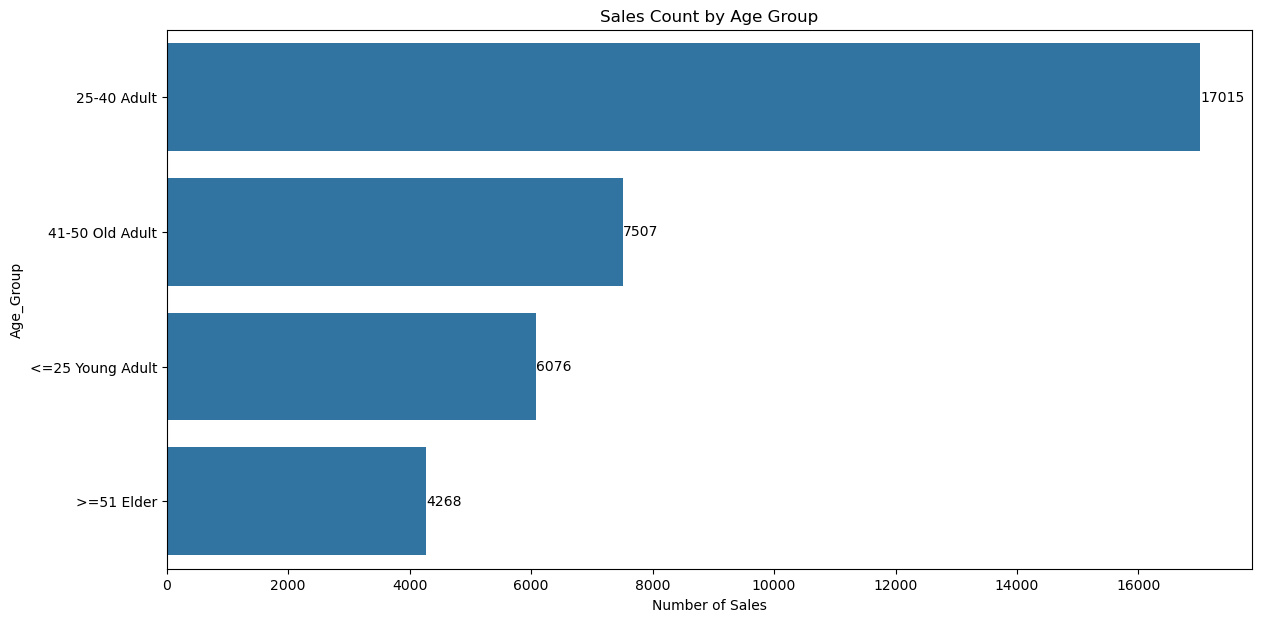

In [55]:
# Total transaction by customer age group


# Create the plot - y for bar chart
plt.figure(figsize=(14, 7))
ax = sns.countplot(y=data["Age_Group"], order= data["Age_Group"].value_counts(ascending=False).index)

# add data labels

# Get the count numbers
values = data["Age_Group"].value_counts(ascending=False).values

# Add the numbers on top of the bars
ax.bar_label(container=ax.containers[0], labels=values)

# customize

plt.ylabel("Age_Group")
plt.xlabel("Number of Sales")
plt.title("Sales Count by Age Group");

### Sales Count by Age Group

We analyzed the distribution of sales across different age groups to identify which demographic segment drives the most transactions.

### Business Context:

Understanding age-based sales distribution enables targeted marketing and resource allocation.

Using `seaborn.countplot` with `y=data["Age_Group"]`, we created a horizontal bar chart sorted by frequency. To enhance clarity, we used `ax.bar_label()` to show exact counts on each bar, extracted using `.value_counts().values`.

#### 🔍 Key Insights:
- The **25–40 Adult** group dominates with over 17,000 transactions.
- There is a steep drop-off in sales for older groups, especially those aged 51+.
- This suggests that mid-career adults are the primary market drivers, likely due to higher purchasing power or product relevance.

These insights can guide marketing strategies and product tailoring for each age group.

### Implications:

Marketing efforts should be optimized for the 25–40 age bracket. For the older groups, this could indicate a need for either different messaging, improved product relevance, or UX adjustments for accessibility.

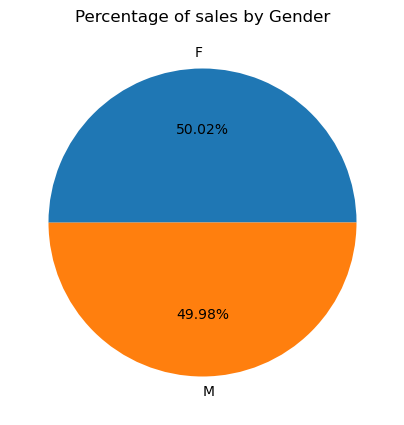

In [56]:
# sales distribution by customer gender

# create the pie chart

fig,ax = plt.subplots(figsize=(5,5))

count = Counter(data["Customer_Gender"])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")

ax.set_title("Percentage of sales by Gender")

plt.show();

#### EXPLANATION

##### fig, ax = plt.subplots(figsize=(5,5))

- plt.subplots() creates a figure and axes object—fig and ax.

- figsize=(5, 5) sets the width and height of the figure to 5 inches each (a square).

- ax is where we will plot the pie chart.

##### count = Counter(data["Customer_Gender"])

- Counter() from Python’s collections module counts how many times each gender appears in the Customer_Gender column.

- For example:
    If the data has ['Male', 'Female', 'Female'] →
    Counter(...) becomes {'Female': 2, 'Male': 1}

##### ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")

- ax.pie(...) plots a pie chart inside the ax object.

🔸 Arguments:
- count.values() → The sizes of the slices (e.g. [2, 1])

- labels=count.keys() → The labels on each slice (e.g. ['Female', 'Male'])

- autopct=... → Tells Matplotlib to show percentage values on each slice.

🧠 autopct=lambda p: f"{p:.2f}%" — What’s happening?
- lambda p means an inline function that takes in the percentage p.

- f"{p:.2f}%" means:
    "Format p to 2 decimal places, and add a % sign."
    So 25.3333 → "25.33%"


##### plt.show();

This displays the plot.

The ; at the end just hides the output text like <AxesSubplot:> in Jupyter, for a cleaner look.

| Part                       | What If You Remove It?                                                                                               |
| -------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| `fig, ax = plt.subplots()` | You can use `plt.pie(...)` directly without axes, but `ax.pie()` is more flexible, especially for multiple plots.    |
| `autopct=...`              | No percentages will be shown on the chart.                                                                           |
| `labels=...`               | The chart won’t show which slice is for which gender.                                                                |
| `lambda p: f"{p:.2f}%"`    | You can use built-in strings like `autopct="%1.1f%%"` instead, but `lambda` gives more control.                      |
| `Counter(...)`             | You could also use: `data["Customer_Gender"].value_counts()` but it returns a `Series`, not a `dict` like `Counter`. |


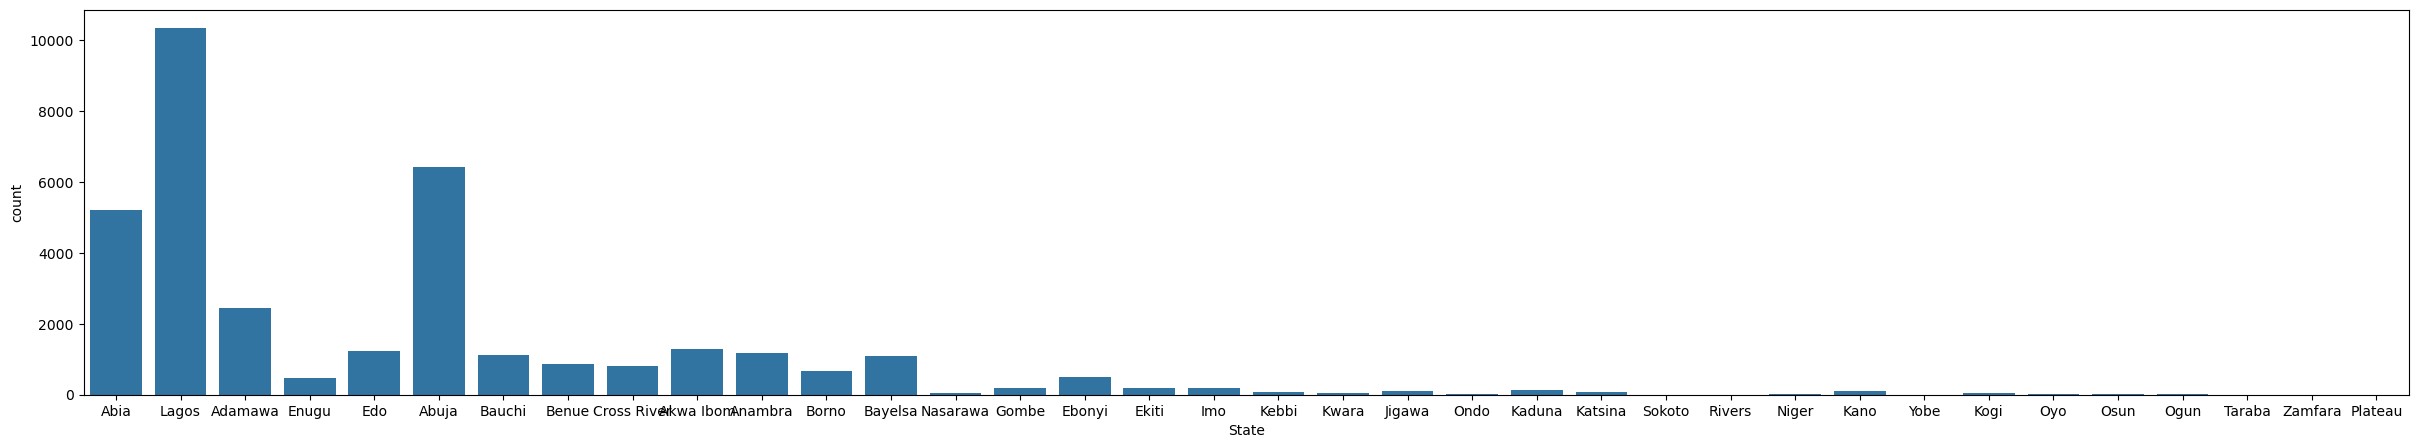

In [57]:
# Total transaction by state

plt.figure(figsize=(30,5))
sns.countplot(x="State", data=data);

State
Lagos          10332
Abuja           6421
Abia            5206
Adamawa         2446
Akwa Ibom       1287
Edo             1229
Anambra         1171
Bauchi          1112
Bayelsa         1092
Benue            869
Cross River      796
Borno            668
Ebonyi           509
Enugu            466
Ekiti            183
Name: count, dtype: int64


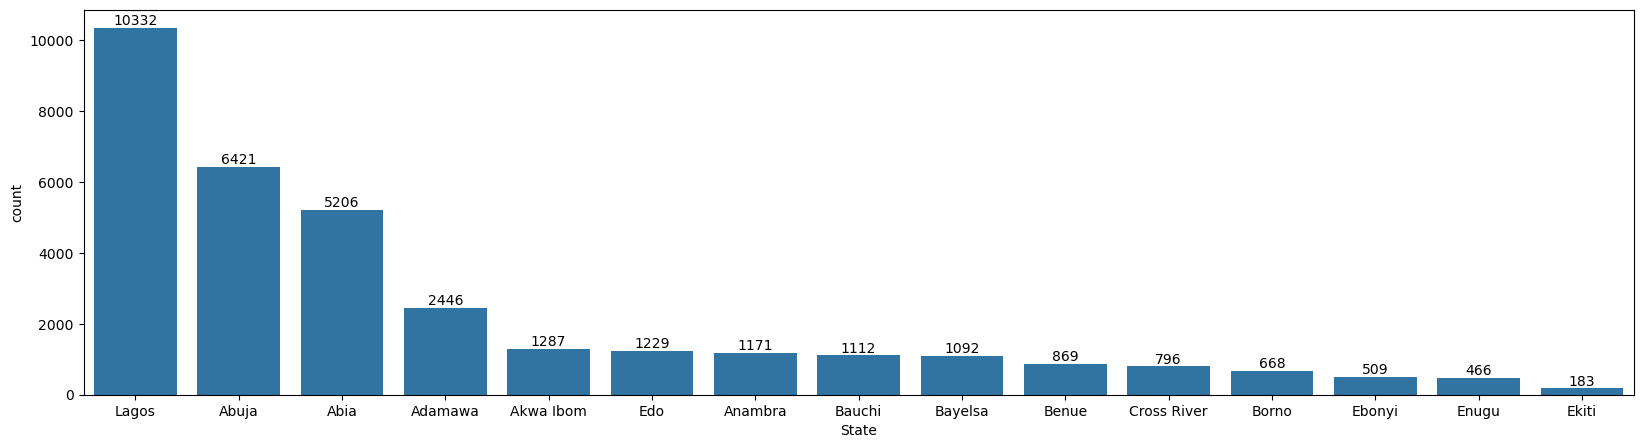

In [58]:
# the above is still very messy, so we filter by top 15

plt.figure(figsize=(20,5))

topten = data["State"].value_counts().head(15)

ax= sns.countplot(x="State", data=data, order=topten.index)

#get the values

values = topten.values

ax.bar_label(container=ax.containers[0], labels=values)

print(topten);

### To understand the geographical concentration of data, I visualized the distribution of entries across states. I selected the top 15 states using .value_counts().head(15) and plotted a countplot ordered accordingly. The bars were annotated with their exact count values using bar_label() for clarity. This makes it easier to interpret frequency disparities at a glance.

- product category
- Sub category
- payment option
- month name

do categorical analysis for all

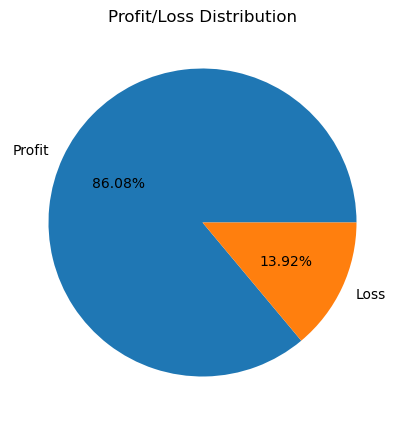

In [59]:
# profitability analysis

# create the pie chart

fig,ax = plt.subplots(figsize=(5,5))

count = Counter(data["Profit_Label"])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")

ax.set_title("Profit/Loss Distribution")

plt.show();

In [60]:
### Narrate your observation

# NUMERICAL DATA VISUALIZATION

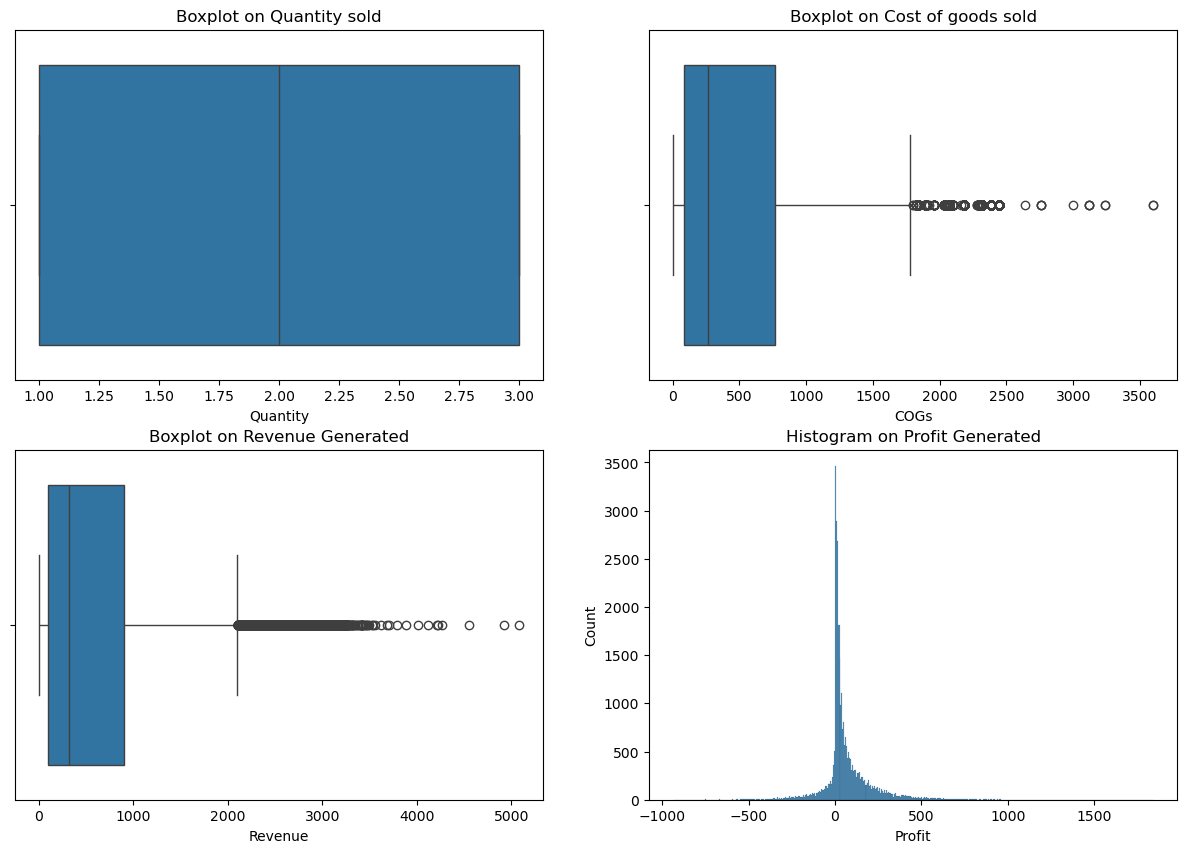

In [61]:
# Quantity, Cost, Revenue and Profit. Using a subplot

fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=data, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="COGs", data=data, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Cost of goods sold")

sns.boxplot(x="Revenue", data=data, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Revenue Generated")

sns.histplot(x="Profit", data=data, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit Generated");

### Explanation of Each Plot:

#### Boxplot on Quantity Sold (Top-left):

   - This shows that the quantity sold is tightly clustered around 1–3 units.
    
   - Minimal variation, and likely no extreme outliers.

 
Business Implications:

Sales Strategy: Customers prefer small purchases. You could introduce bundle deals or volume discounts to encourage higher quantity purchases.

Inventory Planning: Since most sales are in small quantities, focus on maintaining consistent stock levels instead of overstocking large quantities.

Product Packaging: Consider creating multi-packs or combo packs to nudge people toward buying more in a single transaction.



#### Boxplot on Cost of Goods Sold (Top-right):

    - Clear presence of outliers (values far from the rest).
    
    - The majority of cost values are below 1000.
    
    - Skewed distribution with many higher-end outliers.

Business Implications:
 
Product Mix: You likely have a few high-cost items. Are these contributing enough profit? Consider analyzing their profit margins vs. their costs.

Risk Management: High-cost products may carry more financial risk (e.g., if unsold or returned). Consider tracking return rates or offering warranties.

Marketing Strategy: Promote higher-cost products with targeted campaigns to boost visibility and turnover.

#### Boxplot on Revenue Generated (Bottom-left):

    - Similar to cost, revenue shows a strong right skew with many high-value outliers.
    
    - The bulk of the revenue falls below 1000–1500.

Business Implications:

Revenue Drivers: A few sales contribute a large chunk of revenue. Identify and understand what’s driving those big-ticket transactions (e.g., product type, customer type, sales channel).

Customer Segmentation: There may be high-value customers. You can implement a loyalty or premium tier program to retain and upsell to them.

Sales Forecasting: Don't rely solely on average revenue. Consider the median and analyze the frequency of large transactions to avoid misleading projections.


#### Histogram on Profit Generated (Bottom-right):

    - A dense, sharp peak near 0 (or slightly negative).
    
    - Profit values are mostly between -500 and 500.
    
    - Long tails on both sides suggest variability, but a sharp central peak indicates most profits are tightly centered.

Profitability Warning: Many transactions are barely profitable. This could be due to:

High discounting

Inefficient pricing

High cost of goods or shipping

Operational Improvements: Reduce operational or sourcing costs to widen the profit margin.

Pricing Review: Re-evaluate pricing strategy. Consider value-based pricing instead of cost-plus pricing.

Loss-Making Products: Identify and remove or improve products consistently yielding negative profit.


###  Insights:

Sales behavior: Most customers buy in small quantities.

Cost and revenue: While most are low, some very large transactions significantly pull the upper range.

Profit distribution: Most profits are small or break-even, with a mix of gain/loss extremes.

In [62]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month_No', 'Month',
       'Day_No', 'Day', 'Quater', 'Age_Group', 'Revenue', 'COGs', 'Profit',
       'Profit_Label'],
      dtype='object')

In [63]:
# Check High-Cost Items & Their Profitability
# a. Look at the top 10 most expensive products subcategory:

high_cost_subcats = data.groupby("Sub_Category")[["COGs", "Revenue", "Profit"]].mean().sort_values('COGs', ascending=False).head(10)
print(high_cost_subcats)

                       COGs      Revenue      Profit
Sub_Category                                        
IPhone          1838.444856  1891.288316   52.843460
Infinix         1718.967841  1790.037316   71.069475
Samsung         1265.327052  1297.812287   32.485235
Shorts          1063.851572  1217.639753  153.788180
Phone Charger   1028.737864  1367.513981  338.776117
Vests            994.670000  1181.669968  186.999968
Laptop Charger   866.275862  1040.765448  174.489586
Mouse            835.694596  1018.373788  182.679192
Jerseys          766.616935   917.055125  150.438190
Wrist Watch      531.545879   655.701547  124.155668


In [64]:
# Analyze High-Revenue Categories
# a. Total revenue and profit by Sub_Category:

high_revenue_subcats = data.groupby('Sub_Category')[['Revenue', 'Profit']].sum().sort_values('Revenue', ascending=False).head(10)
print(high_revenue_subcats)

                 Revenue     Profit
Sub_Category                       
IPhone        5176456.12  144632.55
Samsung       3921988.73   98170.38
Keyboard      2865914.37  512123.44
Wrist Watch   2738209.66  518474.07
Infinix       2387909.78   94806.68
Jerseys       1834110.25  300876.38
Ear Piece      709407.34  129566.79
Shorts         689184.10   87044.11
Mouse          403276.02   72340.96
Vests          368681.03   58343.99


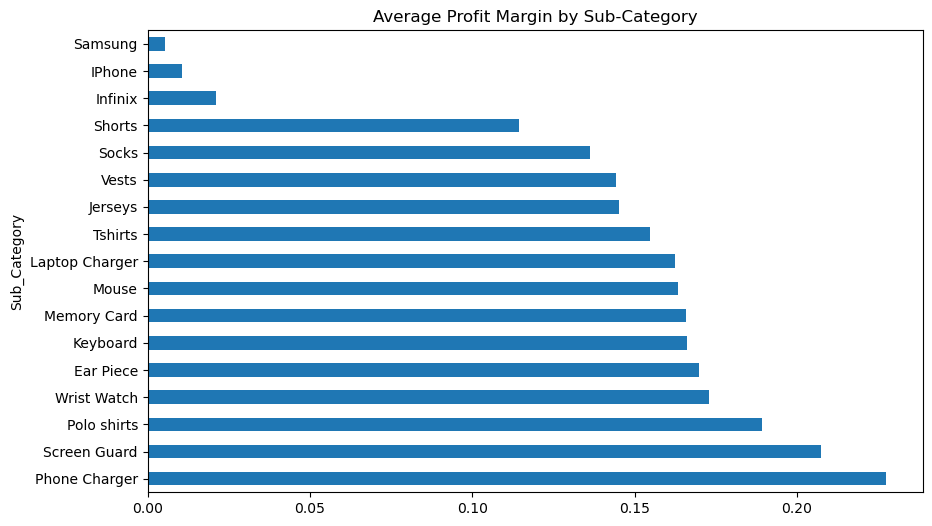

In [65]:
# Compare Profit Margin by Sub-Category
# a. Create Profit Margin:

data['Profit_Margin'] = data['Profit'] / data['Revenue']

margin_by_subcat = data.groupby('Sub_Category')['Profit_Margin'].mean().sort_values(ascending=False)

# plt.figure(figsize=(10,6))
# sns.barplot(x=margin_by_subcat.values, y=margin_by_subcat.index)
# plt.title("Average Profit Margin by Sub-Category")
# plt.xlabel("Profit Margin")
# plt.ylabel("Sub-Category")
# plt.show()

margin_by_subcat.plot(kind='barh', figsize=(10,6))
plt.title("Average Profit Margin by Sub-Category")
plt.show()

In [66]:
# What Drives High Sales?
# Let’s analyze what variables are associated with big profits or revenues.

## a Revenue by customer gender:

data.groupby('Customer_Gender')['Revenue'].mean().sort_values(ascending=False)

Customer_Gender
F    675.463760
M    606.252493
Name: Revenue, dtype: float64

In [67]:
#b. Revenue by product category:
data.groupby('Product_Category')['Revenue'].mean().sort_values(ascending=False)

Product_Category
Phones         1619.393011
Clothing        656.147538
Accessories     329.309626
Name: Revenue, dtype: float64

In [68]:
#c. Revenue by sub-category:

data.groupby('Sub_Category')['Revenue'].mean().sort_values(ascending=False)

Sub_Category
IPhone            1891.288316
Infinix           1790.037316
Phone Charger     1367.513981
Samsung           1297.812287
Shorts            1217.639753
Vests             1181.669968
Laptop Charger    1040.765448
Mouse             1018.373788
Jerseys            917.055125
Wrist Watch        655.701547
Polo shirts        475.735083
Screen Guard       432.026220
Keyboard           257.911660
Tshirts            168.748734
Socks              168.233242
Memory Card        152.085908
Ear Piece          133.976835
Name: Revenue, dtype: float64

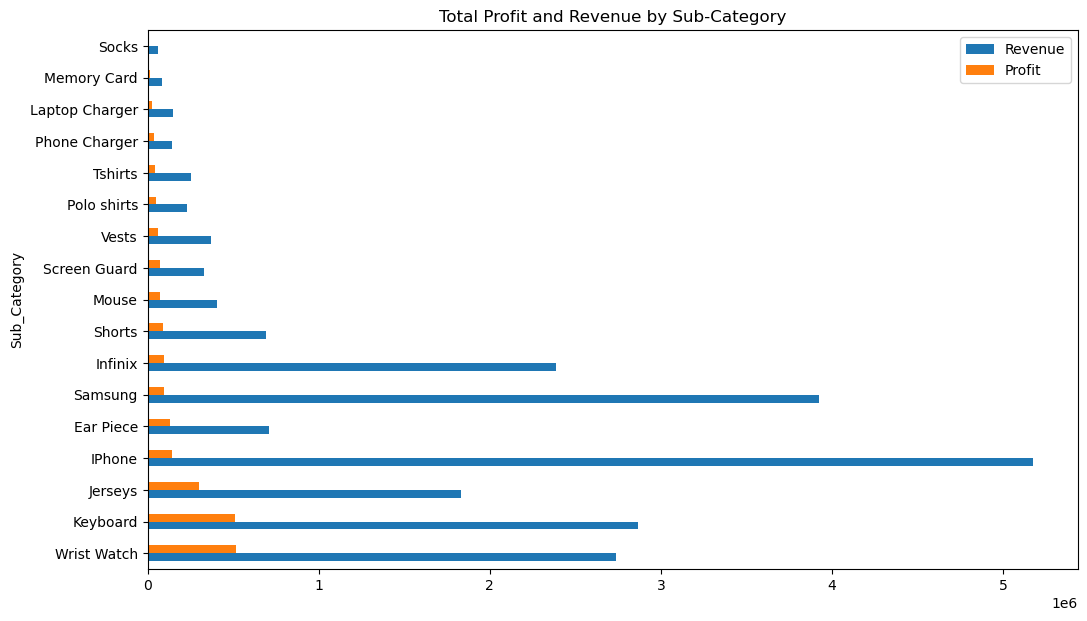

In [69]:
# d. Combine Profit + Revenue by Sub-Category:
profit_rev = data.groupby('Sub_Category')[['Revenue', 'Profit']].sum().sort_values(by='Profit', ascending=False)
profit_rev.plot(kind='barh', figsize=(12,7))
plt.title("Total Profit and Revenue by Sub-Category")
plt.show()


## BIVARIATE ANALYSIS

- Involves analyzing the relationship between 2 variables

In [70]:
cust_prof = data.groupby("Customer")["Profit"].sum().reset_index()
cust_prof

Customer     Profit
0     High  531134.37
1      Low  922094.10
2   Medium  808380.21

In [71]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month_No', 'Month',
       'Day_No', 'Day', 'Quater', 'Age_Group', 'Revenue', 'COGs', 'Profit',
       'Profit_Label', 'Profit_Margin'],
      dtype='object')

''

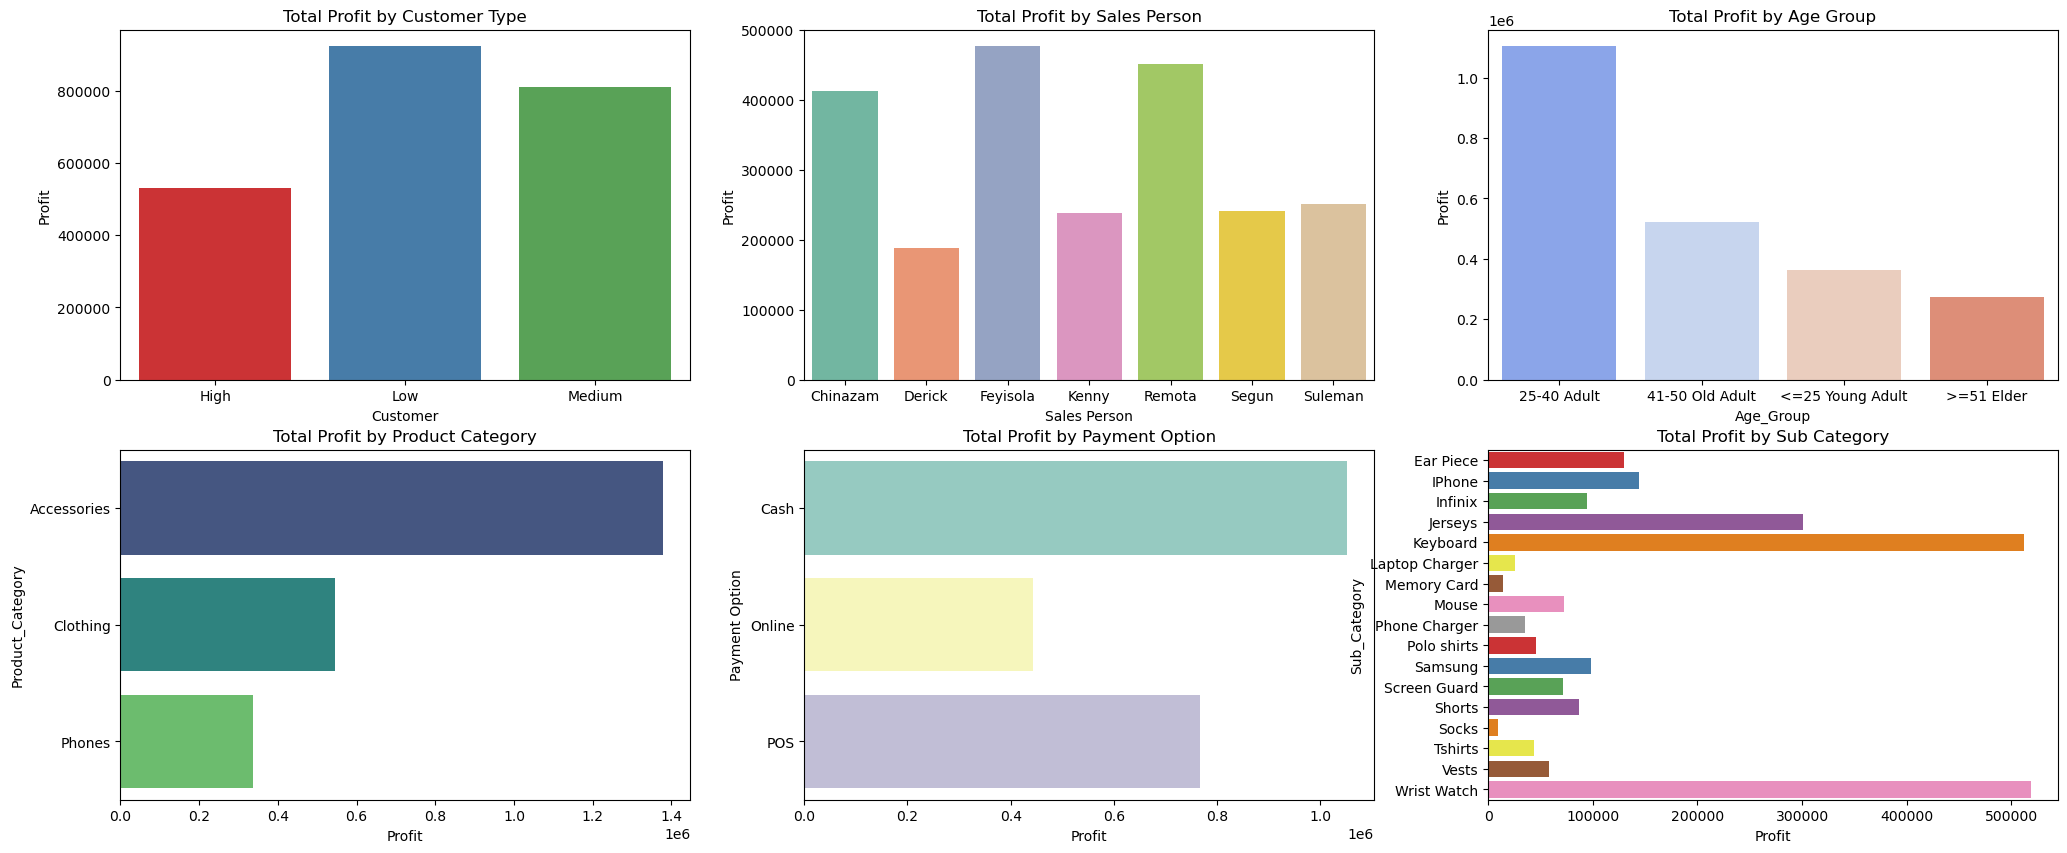

In [72]:
# customer by profit

# create the subplots

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

# fill up the subplots

# 1 

cust_prof = data.groupby("Customer")["Profit"].sum().reset_index()

sns.barplot(x="Customer" ,data=cust_prof, y="Profit", ax=axs[0,0], hue="Customer", dodge=False,  palette="Set1")      # assign hue to x               
axs[0,0].set_title("Total Profit by Customer Type")

SP_prof = data.groupby("Sales Person")["Profit"].sum().reset_index()
sns.barplot(x="Sales Person" ,data=SP_prof, y="Profit", ax=axs[0,1], hue="Sales Person", dodge=False,  palette="Set2")            
axs[0,1].set_title("Total Profit by Sales Person")

Age_Group_prof = data.groupby("Age_Group")["Profit"].sum().reset_index()
sns.barplot(x="Age_Group" ,data=Age_Group_prof, y="Profit", ax=axs[0,2], hue="Age_Group", dodge=False,  palette="coolwarm")            
axs[0,2].set_title("Total Profit by Age Group")

product_cat_prof = data.groupby("Product_Category")["Profit"].sum().reset_index()
sns.barplot(y="Product_Category" ,data=product_cat_prof , x="Profit", ax=axs[1,0], hue="Product_Category", dodge=False,  palette="viridis")            
axs[1,0].set_title("Total Profit by Product Category")

payment_prof = data.groupby("Payment Option")["Profit"].sum().reset_index()
sns.barplot(y="Payment Option" ,data=payment_prof, x="Profit", ax=axs[1,1], hue="Payment Option", dodge=False,  palette="Set3")            
axs[1,1].set_title("Total Profit by Payment Option")

subcat_prof = data.groupby("Sub_Category")["Profit"].sum().reset_index()
sns.barplot(y="Sub_Category" ,data=subcat_prof, x="Profit", ax=axs[1,2], hue="Sub_Category", dodge=False,  palette="Set1")            
axs[1,2].set_title("Total Profit by Sub Category")

;

## Numerical Bivariate Analysis

''

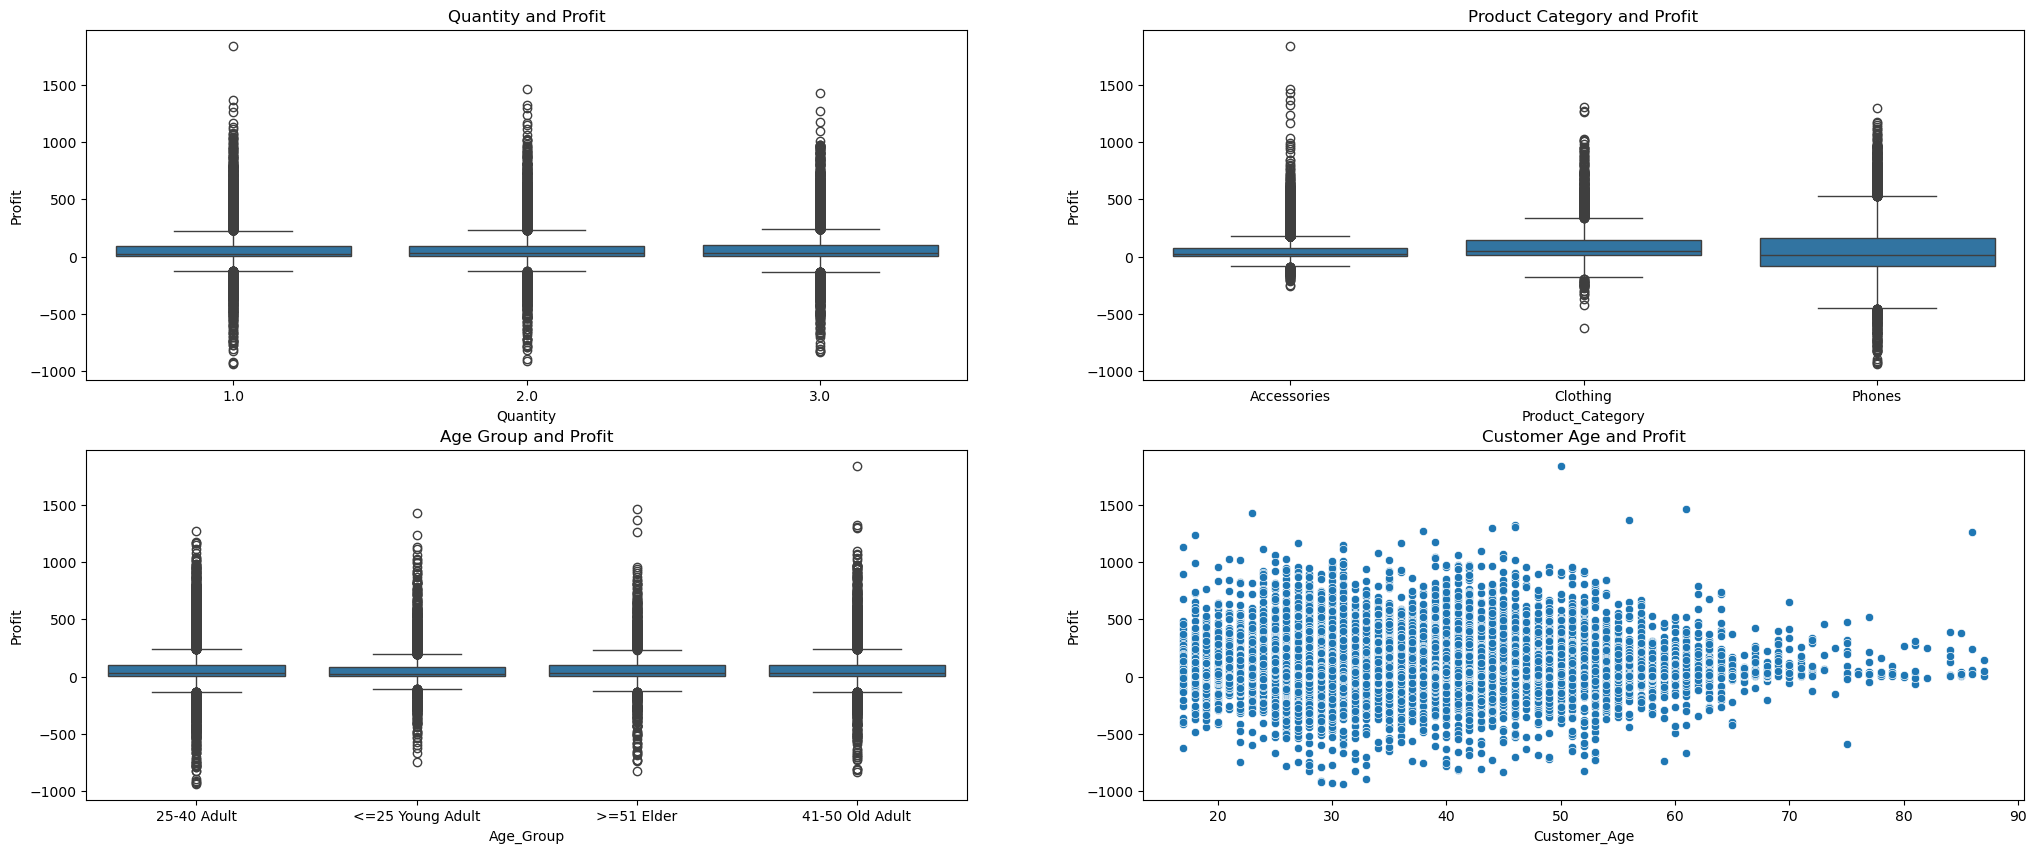

In [73]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))


sns.boxplot(x="Quantity" ,data=data, y="Profit", ax=axs[0,0])                     
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x="Product_Category" ,data=data, y="Profit", ax=axs[0,1])                  
axs[0,1].set_title("Product Category and Profit")

sns.boxplot(x= "Age_Group" ,data=data, y="Profit", ax=axs[1,0])                 
axs[1,0].set_title("Age Group and Profit")

sns.scatterplot(x="Customer_Age" ,data=data, y="Profit", ax=axs[1,1])                   
axs[1,1].set_title("Customer Age and Profit")

;

### MULTIVARIATE ANALYSIS

- Involves analyzing the relationship between three or more variables

In [74]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month_No', 'Month',
       'Day_No', 'Day', 'Quater', 'Age_Group', 'Revenue', 'COGs', 'Profit',
       'Profit_Label', 'Profit_Margin'],
      dtype='object')

''

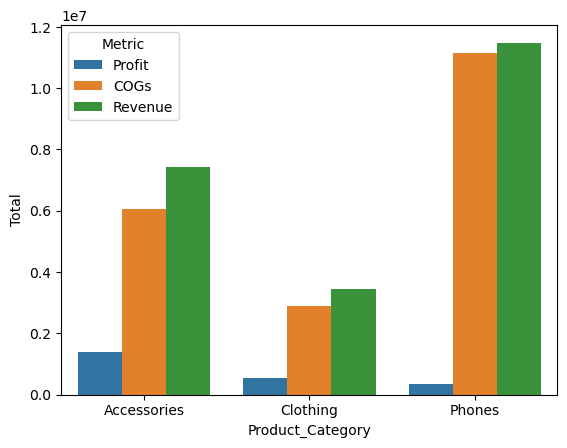

In [77]:
# product category by cost, revenue and profit

procat = data.groupby("Product_Category")[["Profit","COGs","Revenue"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")

sns.barplot(data=procat, x ="Product_Category", y="Total", hue="Metric")

;

In [91]:
data["Month"].unique()

array(['February', 'March', 'April', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'May', 'January'],
      dtype=object)

''

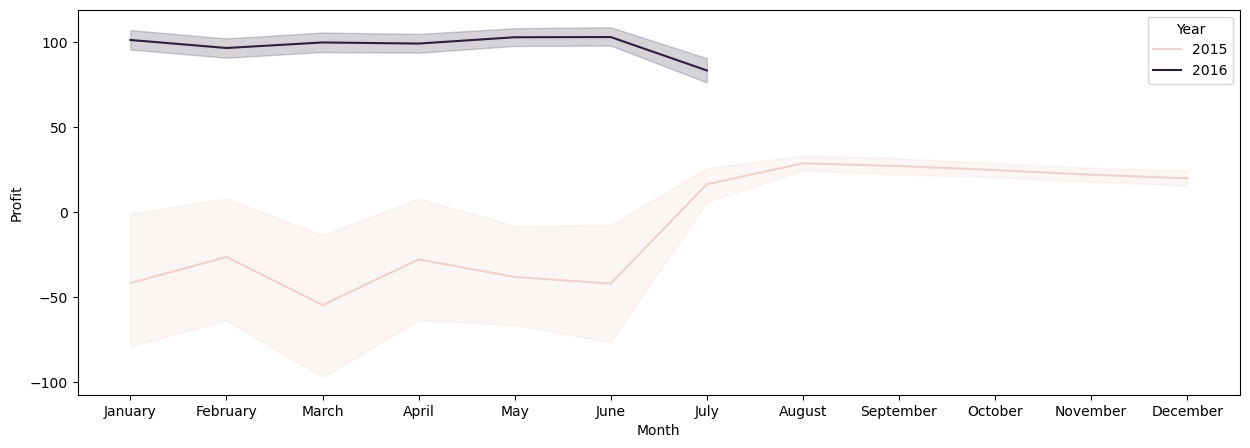

In [93]:
# profit on a year,month basis

# Define month order
# month_order = ["January", "February", "March", "April", "May", "June",
#                "July", "August", "September", "October", "November", "December"]

# data["Month"] = pd.Categorical(data["Month"], categories=month_order, ordered=True)

plt.figure(figsize=(15,5))

sns.lineplot(x='Month', y="Profit", data=data, hue='Year')

;

In [102]:
# using pivot table in python

data.pivot_table(values="Profit", index="Year", columns="Month", aggfunc='sum',observed=True)

#if you don't put aggfunc, Pandas will default to 'mean' — that is, it will calculate the average profit per year-month combo instead of the sum. because the default: aggfunc='mean'

# If your Month column is a categorical type with 12 months, but only January to March are in the dataset:

# With observed=False: you’ll see all 12 months as columns (April–December will show NaN).

# With observed=True: only January to March will be shown — no NaNs for months not in the data.

Month    January   February      March      April        May       June  \
Year                                                                      
2015    -5778.70   -4079.65   -8163.79   -4945.69   -7801.45   -8690.61   
2016   280204.25  263640.18  299777.67  307746.51  356915.59  357549.86   

Month       July    August  September   October  November  December  
Year                                                                 
2015    15104.47  65926.24   62172.33  62950.66   54480.9  67448.12  
2016   107151.79       NaN        NaN       NaN       NaN       NaN

In [88]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month_No', 'Month',
       'Day_No', 'Day', 'Quater', 'Age_Group', 'Revenue', 'COGs', 'Profit',
       'Profit_Label', 'Profit_Margin'],
      dtype='object')

''

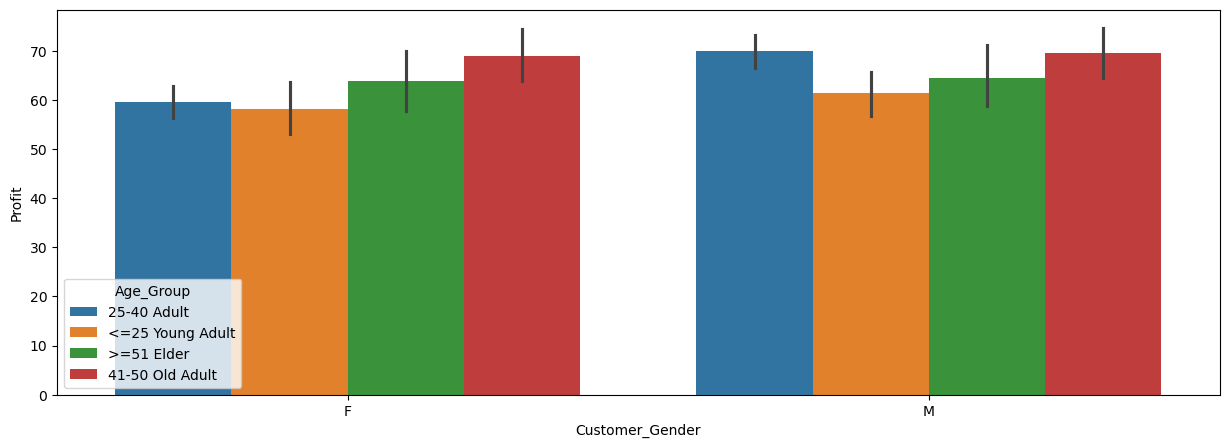

In [107]:
# customer gender, age group and profit

plt.figure(figsize=(15,5))

sns.barplot(x="Customer_Gender", y="Profit", data=data, hue="Age_Group")
;

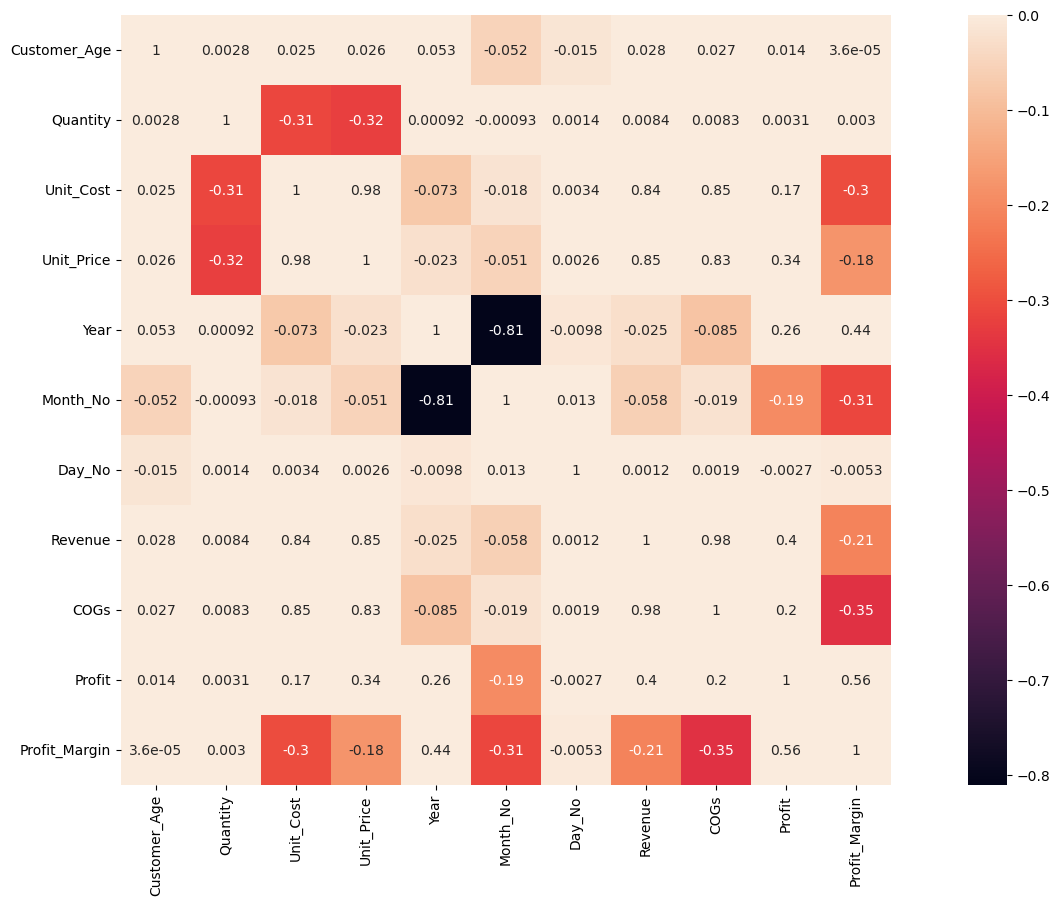

In [117]:
#correlation

a = data.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(a, vmax=0, square=True, annot=True);

| Correlation Coefficient | Meaning                                  |
| ----------------------- | ---------------------------------------- |
| `+1`                    | Perfect **positive** linear relationship |
| `0.7 to 0.9`            | Strong positive correlation              |
| `0.4 to 0.6`            | Moderate positive correlation            |
| `0.1 to 0.3`            | Weak positive correlation                |
| `0`                     | No linear correlation                    |
| `-0.1 to -0.3`          | Weak negative correlation                |
| `-0.4 to -0.6`          | Moderate negative correlation            |
| `-0.7 to -0.9`          | Strong negative correlation              |
| `-1`                    | Perfect **negative** linear relationship |


Correlation measures the strength and direction of a linear relationship between two variables.

It doesn’t imply causation (just association).

Commonly used in EDA (Exploratory Data Analysis) to check if two variables move together.

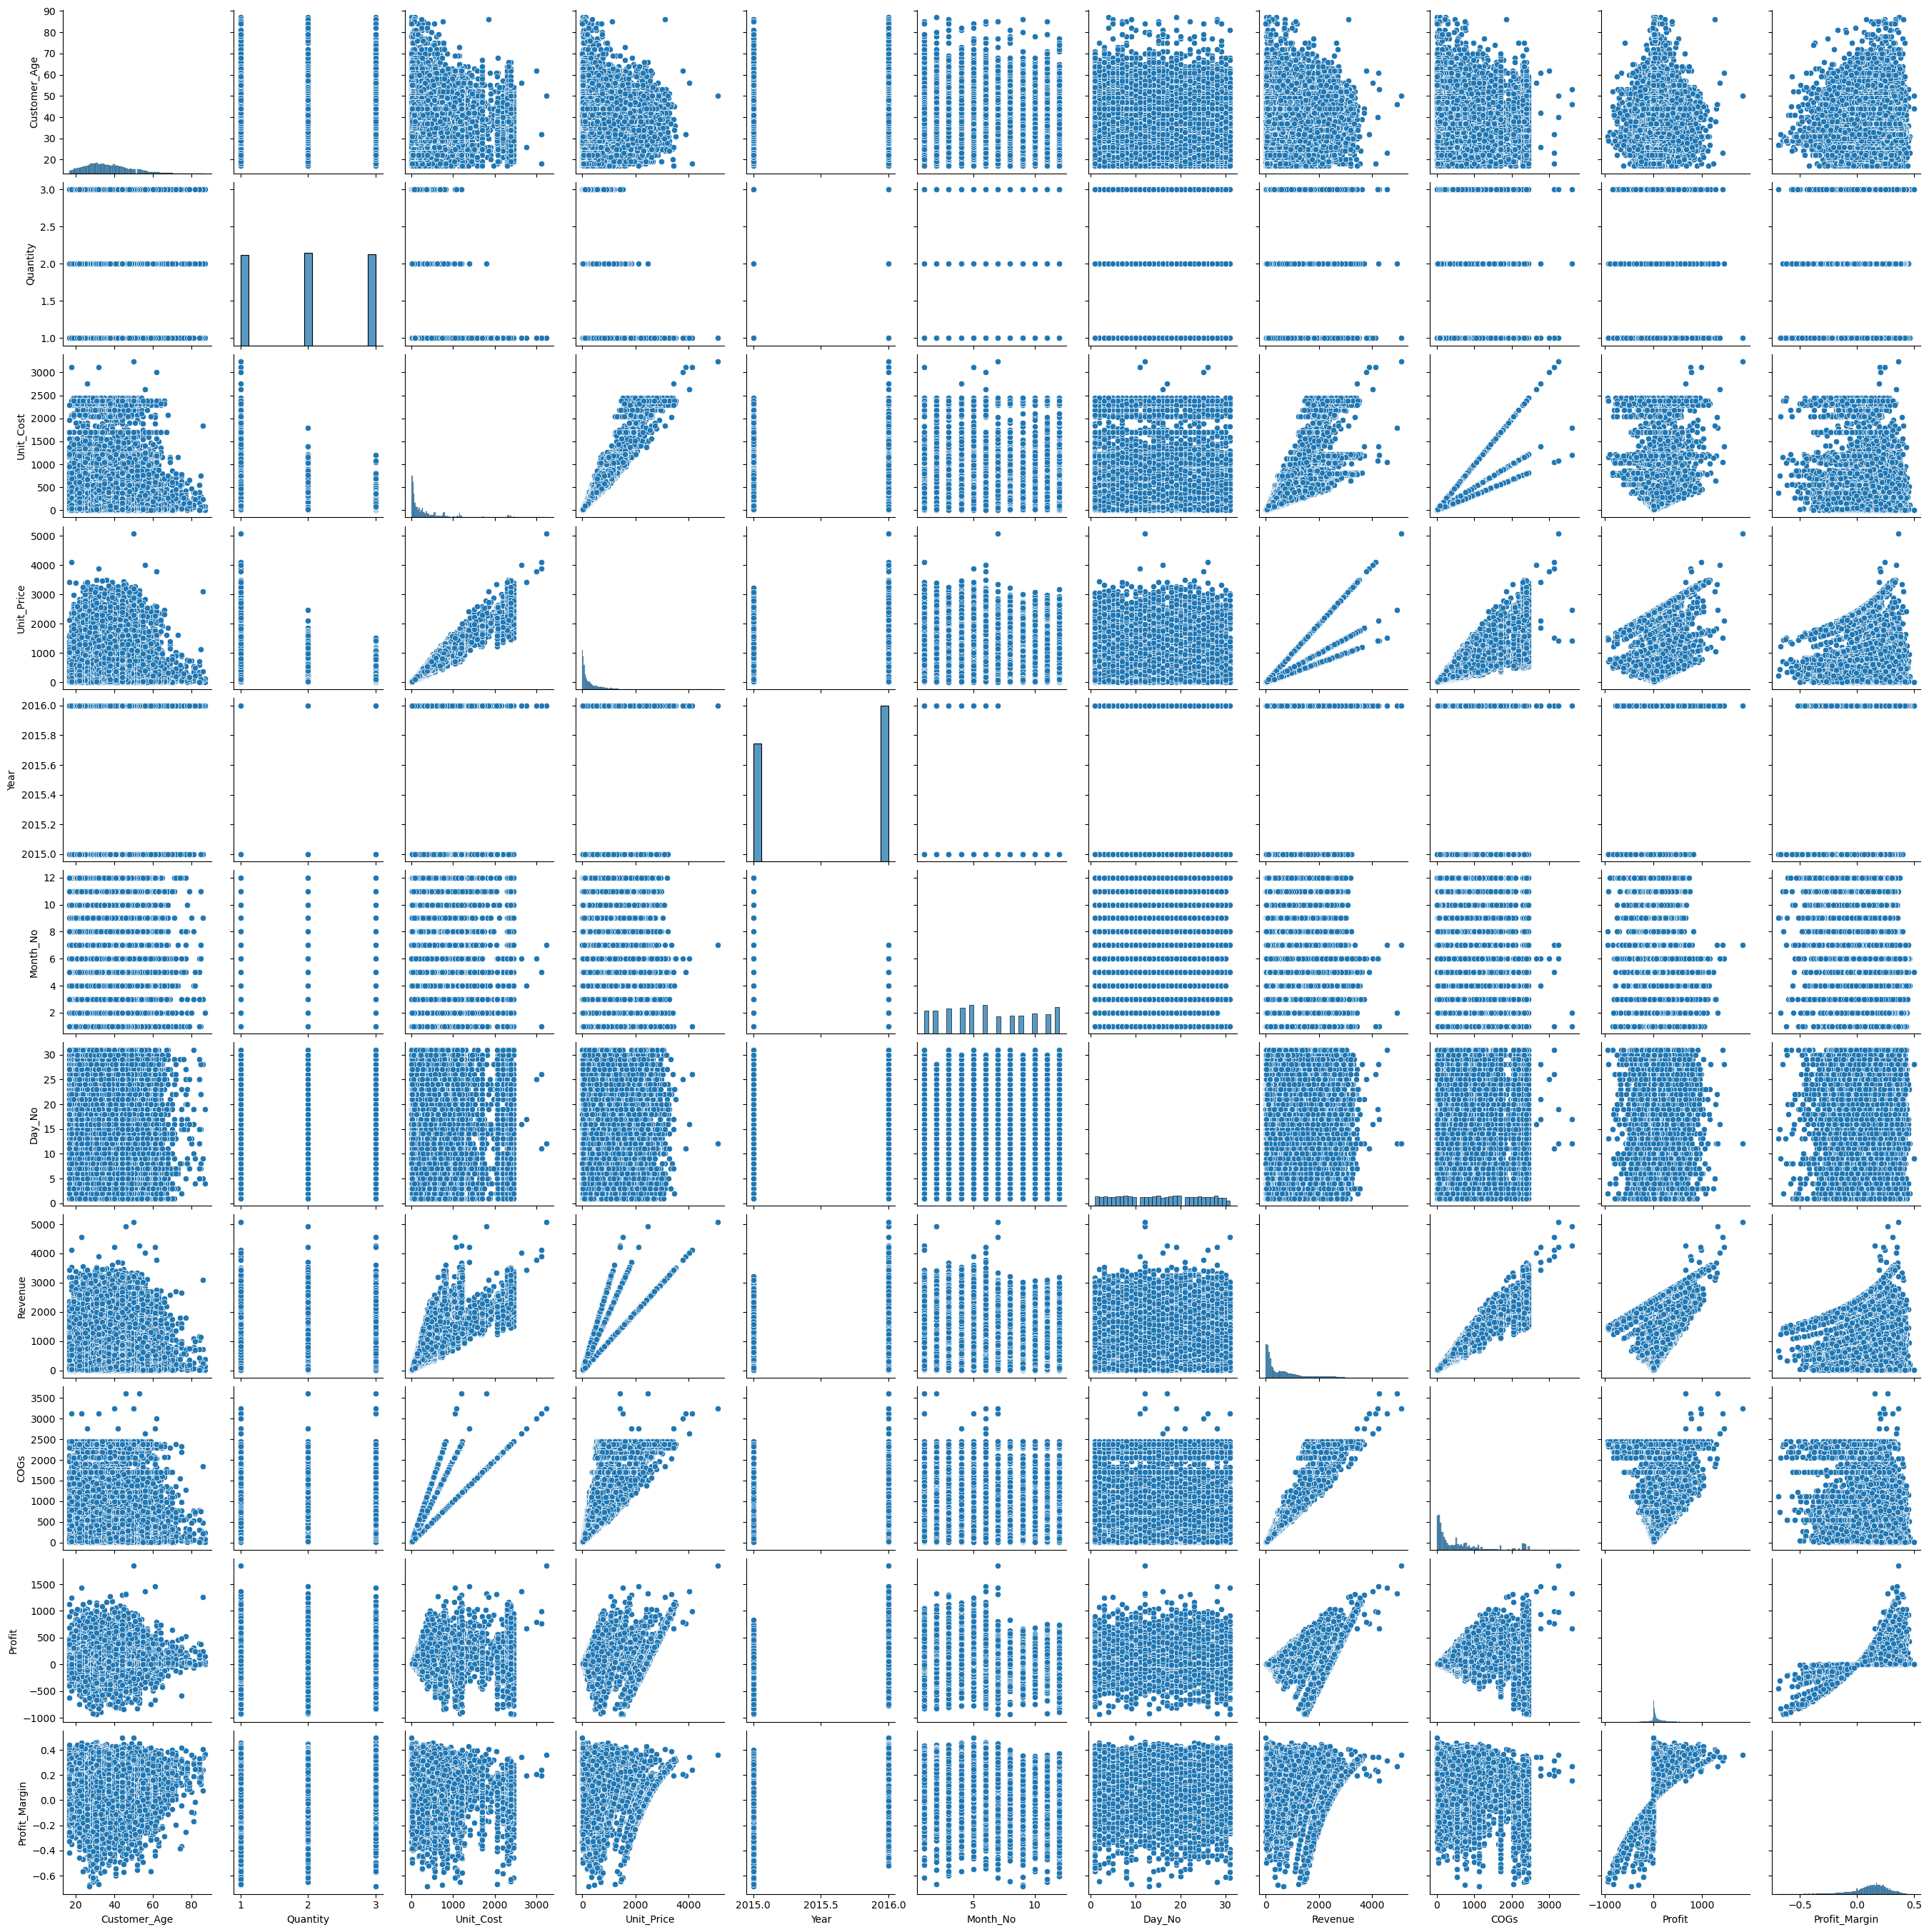

In [119]:
sns.pairplot(data, height=2.5);